In [1]:
#Loading neccesary packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [8]:
df = pd.read_csv('/content/Groceries_data.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38765, 7)

In [10]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [21]:
df['Member_number'].duplicated().sum() , df.shape , len(df['Member_number'].unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(34867, (38765, 7), 3898)

In [13]:
#we have 167 groceries
len(df['itemDescription'].unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


167

In [24]:
basket = df.groupby('Member_number')['itemDescription'].agg(list).reset_index()
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,itemDescription
0,1000,"[soda, canned beer, sausage, sausage, whole mi..."
1,1001,"[frankfurter, frankfurter, beef, sausage, whol..."
2,1002,"[tropical fruit, butter milk, butter, frozen v..."
3,1003,"[sausage, root vegetables, rolls/buns, deterge..."
4,1004,"[other vegetables, pip fruit, root vegetables,..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-8c7480d09252>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(basket['itemDescription'].apply(len))


<Axes: xlabel='itemDescription', ylabel='Density'>

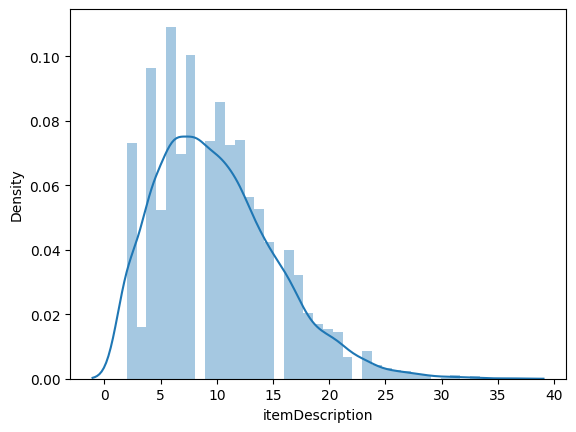

In [36]:
import seaborn as sns
sns.distplot(basket['itemDescription'].apply(len))

In [38]:
# We choose threshold 7 (Membors who purchase max items together), and for not occur null values
basket_data = basket[basket['itemDescription'].apply(len) == 7]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
basket_data = basket_data['itemDescription'].apply(pd.Series)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
basket_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(237, 7)

In [44]:
enc_basket_data = pd.get_dummies(basket_data , dtype='int')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
enc_basket_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0_Instant food products,0_UHT-milk,0_beef,0_berries,0_beverages,0_bottled beer,0_bottled water,0_butter,0_butter milk,0_cake bar,...,6_specialty cheese,6_specialty chocolate,6_specialty vegetables,6_sweet spreads,6_vinegar,6_waffles,6_whipped/sour cream,6_white wine,6_whole milk,6_yogurt
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Training Apriori model**

In [67]:
frequent_itemset = apriori(enc_basket_data , min_support=0.01 , use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [69]:
# We can see frequently purchased together
print(frequent_itemset)

      support                           itemsets
0    0.016878                       (0_UHT-milk)
1    0.029536                           (0_beef)
2    0.012658                        (0_berries)
3    0.033755                   (0_bottled beer)
4    0.016878                  (0_bottled water)
..        ...                                ...
223  0.012658       (3_whole milk, 6_newspapers)
224  0.012658        (4_domestic eggs, 3_yogurt)
225  0.012658  (6_soda, 4_fruit/vegetable juice)
226  0.012658     (5_onions, 4_other vegetables)
227  0.012658       (5_whole milk, 4_rolls/buns)

[228 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
rules = association_rules(frequent_itemset , metric='lift' , min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0_citrus fruit),(5_canned beer),0.046414,0.029536,0.012658,0.272727,9.233766,0.011287,1.334388,0.935103
1,(5_canned beer),(0_citrus fruit),0.029536,0.046414,0.012658,0.428571,9.233766,0.011287,1.668776,0.918841
2,(0_frankfurter),(1_other vegetables),0.071730,0.113924,0.012658,0.176471,1.549020,0.004486,1.075949,0.381818
3,(1_other vegetables),(0_frankfurter),0.113924,0.071730,0.012658,0.111111,1.549020,0.004486,1.044304,0.400000
4,(2_long life bakery product),(0_frankfurter),0.012658,0.071730,0.012658,1.000000,13.941176,0.011750,inf,0.940171
...,...,...,...,...,...,...,...,...,...,...
67,(4_fruit/vegetable juice),(6_soda),0.033755,0.046414,0.012658,0.375000,8.079545,0.011092,1.525738,0.906841
68,(5_onions),(4_other vegetables),0.016878,0.050633,0.012658,0.750000,14.812500,0.011804,3.797468,0.948498
69,(4_other vegetables),(5_onions),0.050633,0.016878,0.012658,0.250000,14.812500,0.011804,1.310830,0.982222
70,(5_whole milk),(4_rolls/buns),0.059072,0.054852,0.012658,0.214286,3.906593,0.009418,1.202915,0.790732


In [73]:
rules.sort_values('support' , ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
46,(3_rolls/buns),(1_soda),0.075949,0.050633,0.021097,0.277778,5.486111,0.017252,1.314508,0.884932
33,(1_other vegetables),(2_whole milk),0.113924,0.075949,0.021097,0.185185,2.438272,0.012445,1.134062,0.665714
32,(2_whole milk),(1_other vegetables),0.075949,0.113924,0.021097,0.277778,2.438272,0.012445,1.226874,0.638356
47,(1_soda),(3_rolls/buns),0.050633,0.075949,0.021097,0.416667,5.486111,0.017252,1.584087,0.861333
40,(4_rolls/buns),(1_other vegetables),0.054852,0.113924,0.016878,0.307692,2.700855,0.010629,1.279887,0.666295
41,(1_other vegetables),(4_rolls/buns),0.113924,0.054852,0.016878,0.148148,2.700855,0.010629,1.109521,0.710714
0,(0_citrus fruit),(5_canned beer),0.046414,0.029536,0.012658,0.272727,9.233766,0.011287,1.334388,0.935103
51,(2_brown bread),(4_root vegetables),0.029536,0.029536,0.012658,0.428571,14.510204,0.011786,1.698312,0.959420
50,(4_root vegetables),(2_brown bread),0.029536,0.029536,0.012658,0.428571,14.510204,0.011786,1.698312,0.959420
49,(1_whole milk),(3_whole milk),0.046414,0.084388,0.012658,0.272727,3.231818,0.008741,1.258966,0.724189
